# This file will test that your environment is configured correctly to use the tools in this repository. If successful, you will see a window with a random agent operating the cartpole environment for a short while. You will see observations from the environment printed to the console.



In [1]:
import gym
import numpy as np
import random

In [2]:
import gym
env = gym.make('CartPole-v0')
env.reset()
for _ in range(1000):
    env.render()
    env.step(env.action_space.sample()) # take a random action
env.close()

/opt/anaconda3/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [3]:
import gym
env = gym.make('CartPole-v0')
for i_episode in range(20):
    observation = env.reset()
    for t in range(100):
        env.render()
        print(observation)
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
env.close()

[-0.01028469  0.04162744 -0.01595312 -0.02290221]
[-0.00945214  0.2369745  -0.01641116 -0.32057553]
[-0.00471265  0.04209006 -0.02282267 -0.0331129 ]
[-0.00387085 -0.15269729 -0.02348493  0.25228276]
[-0.00692479 -0.34747616 -0.01843927  0.53746655]
[-0.01387432 -0.15209988 -0.00768994  0.23903111]
[-0.01691631  0.04313108 -0.00290932 -0.05606749]
[-0.01605369  0.23829462 -0.00403067 -0.34966691]
[-0.0112878   0.04323023 -0.01102401 -0.0582577 ]
[-0.0104232   0.2385085  -0.01218916 -0.3543983 ]
[-0.00565303  0.43380162 -0.01927713 -0.65089975]
[ 0.00302301  0.2389534  -0.03229512 -0.36434884]
[ 0.00780207  0.43451908 -0.0395821  -0.66703752]
[ 0.01649246  0.63016851 -0.05292285 -0.9719159 ]
[ 0.02909583  0.43579518 -0.07236117 -0.69631617]
[ 0.03781173  0.24174739 -0.08628749 -0.42726182]
[ 0.04264668  0.43797871 -0.09483273 -0.74585075]
[ 0.05140625  0.63427239 -0.10974974 -1.06680732]
[ 0.0640917   0.8306617  -0.13108589 -1.39182062]
[ 0.08070493  0.63739283 -0.1589223  -1.14283351]


In [4]:
import gym
env = gym.make('CartPole-v0')
print(env.action_space)

print(env.observation_space)


Discrete(2)
Box(4,)


In [5]:
print(env.observation_space.high)
print(env.observation_space.low)

[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]


In [6]:
from gym import spaces
space = spaces.Discrete(8) # Set with 8 elements {0, 1, 2, ..., 7}
x = space.sample()
assert space.contains(x)
assert space.n == 8

In [7]:
from gym import envs
print(envs.registry.all())

dict_values([EnvSpec(Copy-v0), EnvSpec(RepeatCopy-v0), EnvSpec(ReversedAddition-v0), EnvSpec(ReversedAddition3-v0), EnvSpec(DuplicatedInput-v0), EnvSpec(Reverse-v0), EnvSpec(CartPole-v0), EnvSpec(CartPole-v1), EnvSpec(MountainCar-v0), EnvSpec(MountainCarContinuous-v0), EnvSpec(Pendulum-v0), EnvSpec(Acrobot-v1), EnvSpec(LunarLander-v2), EnvSpec(LunarLanderContinuous-v2), EnvSpec(BipedalWalker-v3), EnvSpec(BipedalWalkerHardcore-v3), EnvSpec(CarRacing-v0), EnvSpec(Blackjack-v0), EnvSpec(KellyCoinflip-v0), EnvSpec(KellyCoinflipGeneralized-v0), EnvSpec(FrozenLake-v0), EnvSpec(FrozenLake8x8-v0), EnvSpec(CliffWalking-v0), EnvSpec(NChain-v0), EnvSpec(Roulette-v0), EnvSpec(Taxi-v3), EnvSpec(GuessingGame-v0), EnvSpec(HotterColder-v0), EnvSpec(Reacher-v2), EnvSpec(Pusher-v2), EnvSpec(Thrower-v2), EnvSpec(Striker-v2), EnvSpec(InvertedPendulum-v2), EnvSpec(InvertedDoublePendulum-v2), EnvSpec(HalfCheetah-v2), EnvSpec(HalfCheetah-v3), EnvSpec(Hopper-v2), EnvSpec(Hopper-v3), EnvSpec(Swimmer-v2), EnvSp

# This file contains workings for the taxi problem tutorial at: https://www.learndatasci.com/tutorials/reinforcement-q-learning-scratch-python-openai-gym/ All credit to the authors.


In [8]:
env = gym.make("Taxi-v3").env 

env.render()


+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [9]:
env.reset() # reset environment to a new, random state
env.render()

print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))



+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Action Space Discrete(6)
State Space Discrete(500)


In [10]:
state = env.encode(3, 1, 2, 0) # (taxi row, taxi column, passenger index, destination index)
print("State:", state)

env.s = state
env.render()


State: 328
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [11]:
env.P[328]


{0: [(1.0, 428, -1, False)],
 1: [(1.0, 228, -1, False)],
 2: [(1.0, 348, -1, False)],
 3: [(1.0, 328, -1, False)],
 4: [(1.0, 328, -10, False)],
 5: [(1.0, 328, -10, False)]}

# Implementation of Random Policy 

In [12]:
env.s = 328  # set environment to illustration's state

epochs = 0
penalties, reward = 0, 0

frames = [] # for animation

done = False

while not done:
    action = env.action_space.sample()
    state, reward, done, info = env.step(action)

    if reward == -10:
        penalties += 1
    
    # Put each rendered frame into dict for animation
    frames.append({
        'frame': env.render(mode='ansi'),
        'state': state,
        'action': action,
        'reward': reward
        }
    )

    epochs += 1
    
print("Timesteps taken: {}".format(epochs))
print("Penalties incurred: {}".format(penalties))


Timesteps taken: 803
Penalties incurred: 256


In [13]:
total_epochs, total_penalties = 0, 0
episodes = 100

all_rewards = []

for _ in range(episodes):
    state = env.reset()
    episode_rewards = 0
    epochs, penalties, reward = 0, 0, 0
    
    done = False
    
    while not done:
        action = env.action_space.sample()
        state, reward, done, info = env.step(action)
        
        if reward == -10:
            penalties += 1

        epochs += 1
        all_rewards.append(episode_rewards)

    total_penalties += penalties
    total_epochs += epochs

Avr_Time = total_epochs / episodes
Avr_Pen = total_penalties / episodes
print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {Avr_Time}")
print(f"Average penalties per episode: {Avr_Pen}")


Results after 100 episodes:
Average timesteps per episode: 2616.65
Average penalties per episode: 850.21


In [14]:
from IPython.display import clear_output
from time import sleep

def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        #print(frame['frame'].getvalue())
        print(frame['frame'])
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(.1)
        
print_frames(frames)



+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Timestep: 803
State: 0
Action: 5
Reward: 20


# Implementation of Q-Learning Algorithm

In [15]:
import numpy as np
q_table = np.zeros([env.observation_space.n, env.action_space.n])



In [16]:
%%time
"""Training the agent"""

import random
from IPython.display import clear_output

# Hyperparameters
alpha = 0.1
gamma = 0.6
epsilon = 0.1

# For plotting metrics
all_epochs = []
all_penalties = []

for i in range(1, 100001):
    state = env.reset()

    epochs, penalties, reward, = 0, 0, 0
    done = False
    
    while not done:
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explore action space
        else:
            action = np.argmax(q_table[state]) # Exploit learned values

        next_state, reward, done, info = env.step(action) 
        
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value

        if reward == -10:
            penalties += 1

        state = next_state
        epochs += 1
        
    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")

print("Training finished.\n")


Episode: 100000
Training finished.

CPU times: user 1min 3s, sys: 13.3 s, total: 1min 16s
Wall time: 1min 8s


In [17]:
q_table[328]



array([ -2.39259428,  -2.27325184,  -2.4088229 ,  -2.35956293,
       -10.73670389, -10.08147719])

In [18]:
"""Evaluate agent's performance after Q-learning"""

total_epochs, total_penalties = 0, 0
episodes = 100
all_rewards = []

for _ in range(episodes):
    state = env.reset()
    episode_rewards =0
    epochs, penalties, reward = 0, 0, 0
    
    done = False
    
    while not done:
        action = np.argmax(q_table[state])
        state, reward, done, info = env.step(action)

        if reward == -10:
            penalties += 1

        epochs += 1
        all_rewards.append(episode_rewards)

    total_penalties += penalties
    total_epochs += epochs

Avr_time_Q = total_epochs / episodes
Avr_Pen_Q = total_penalties / episodes
print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {Avr_time_Q}")
print(f"Average penalties per episode: {Avr_Pen_Q}")


Results after 100 episodes:
Average timesteps per episode: 12.66
Average penalties per episode: 0.0


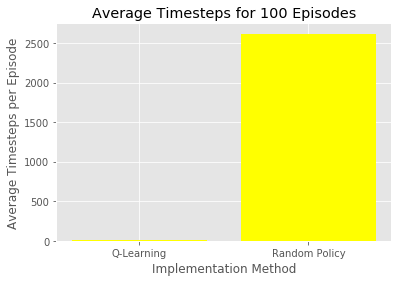

In [19]:
import matplotlib.pyplot as plt

#plot the avg timesteps for q-learning and random policy
plt.style.use('ggplot')

x = ['Q-Learning','Random Policy']
avg_timesteps = [Avr_time_Q, Avr_Time]

plt.bar(x, avg_timesteps, color='yellow')
plt.xlabel("Implementation Method")
plt.ylabel("Average Timesteps per Episode")
plt.title("Average Timesteps for 100 Episodes")


plt.show()

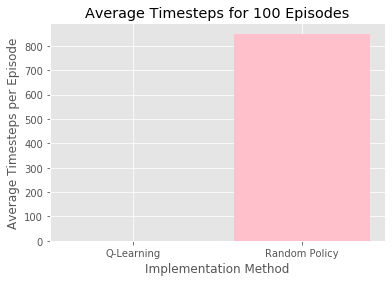

In [20]:
import matplotlib.pyplot as plt

#plot the avg timesteps for q-learning and random policy
plt.style.use('ggplot')

x = ['Q-Learning','Random Policy']
avg_timesteps = [Avr_Pen_Q, Avr_Pen]

plt.bar(x, avg_timesteps, color='pink')
plt.xlabel("Implementation Method")
plt.ylabel("Average Timesteps per Episode")
plt.title("Average Timesteps for 100 Episodes")


plt.show()

# Cart-Pole Problem 

In [21]:
import gym
import numpy as np
import random
from IPython.display import clear_output

In [22]:
#initialise the env
env = gym.make('CartPole-v0')

# Implementation of Random Policy

In [23]:
#initialise metric variables
total_epochs = 0
episodes = 100
rand_ep_reward_list = []
ep_reward = 0

#loop through 100 episodes (100 different passengers)
for _ in range(episodes):
    #set current state to starting environment
    state = env.reset()
    epochs, reward = 0, 0
    
    #done = pole has fallen from cart
    done = False

    #while episode incomplete
    while not done:
        #view visualisation
        env.render()
        #select a random action
        action = env.action_space.sample()
        #take action
        state, reward, done, info = env.step(action)
        #update the sum of rewards for this episode
        ep_reward = ep_reward + reward

        epochs += 1

    #once 100 episode are complete, sum total episodes and append list with rewards per episode
    total_epochs += epochs
    rand_ep_reward_list.append(ep_reward)
    ep_reward = 0

#store metrics
avg_time = total_epochs / episodes

#print evaluation of agents performance. Greater number of timesteps = better performance
print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {avg_time}")

Results after 100 episodes:
Average timesteps per episode: 21.24


# Implementation of Q-Learning Algorithm

In [24]:
# create buckets with upper and lower limits so that continuous state space can be discretised
num_buckets = 4
buckets = [
#cart position
np.linspace(-2.4, 2.4, num_buckets + 1)[1:-1],
#art velocity
np.linspace(-3.0, 3.0, num_buckets + 1)[1:-1],
#pole angle
np.linspace(-0.5, 0.5, num_buckets + 1)[1:-1],
#tip pole velocity
np.linspace(-2.0, 2.0, num_buckets + 1)[1:-1]
        ]

# create q-table of num_states * num_actions
num_actions = 2
max_buckets = max(len(buckets) for bucket in buckets)
num_states = (max_buckets + 1) ** len(buckets)
q_table = np.zeros(shape=(num_states, num_actions))

# Discretize the 4 variables for state and reduce them to a single integer representing state
def discretize_state(observation):
    state = sum(
        np.digitize(x=feature, bins=buckets[i]) * ((max_buckets + 1) ** i)
        for i, feature in enumerate(observation)
    )
    return state

In [25]:
%%time

# Hyperparameters
alpha = 0.2
gamma = 0.5
epsilon = 0.1

# For plotting metrics
all_epochs = []
ep_reward = 0
q_ep_reward_list = []

#train over 10,000 episodes
for i in range(1, 10001):
    state = discretize_state(env.reset())
    epochs, reward = 0, 0
    
    done = False
    
    #while 10,000 episodes are not complete
    while not done:
        #decide on exploration or exploitation based on comparison between random number (0-1) and epsilon
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explore action space
        else:
            action = np.argmax(q_table[state]) # Exploit learned values

        #take action
        next_state, reward, done, info = env.step(action) 
        next_state = discretize_state(next_state)
        #calculate total reward for this episode
        ep_reward = ep_reward + reward

        #get old q_value
        old_value = q_table[state, action]
        #obtain the maximum reward for next state
        next_max = np.max(q_table[next_state])
        #obtain new q value after action was taken
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        #update q_table with new q value
        q_table[state, action] = new_value

        #update state with new current state
        state = next_state
        epochs += 1

    #add total reward for each episode to a list
    q_ep_reward_list.append(ep_reward)
    ep_reward = 0

    #live update on current episode    
    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")

print("Training finished.\n")

Episode: 10000
Training finished.

CPU times: user 15.5 s, sys: 1.94 s, total: 17.4 s
Wall time: 16.9 s


In [26]:
#initialise metrics
total_epochs = 0
episodes = 100

#for each of the 100 episodes
for e in range(episodes):
    #set environment to initial environment
    state = env.reset()
    #discretise environment
    state = discretize_state(state)
    epochs, reward= 0, 0

    #False = pole has not fallen over
    done = False

    while not done:
        # Render environment
        env.render()
        #choose action based on best q value in q_table
        action = np.argmax(q_table[state])
        #update state, reward, done, info based on action
        state, reward, done, info = env.step(action)
        state = discretize_state(state)

        epochs += 1

    total_epochs += epochs

#store metrics
avg_time_q = total_epochs / episodes

print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {avg_time_q}")

Results after 100 episodes:
Average timesteps per episode: 12.98


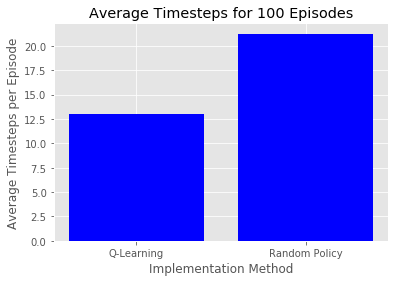

In [27]:
import matplotlib.pyplot as plt 
#plot the avg penalties for q-learning and random policy
#plt.style.use('ggplot')

a = ['Q-Learning','Random Policy']
avg_timestep = [avg_time_q, avg_time]

plt.bar(a, avg_timestep, color= 'blue')
plt.xlabel("Implementation Method")
plt.ylabel("Average Timesteps per Episode")
plt.title("Average Timesteps for 100 Episodes")


plt.show()

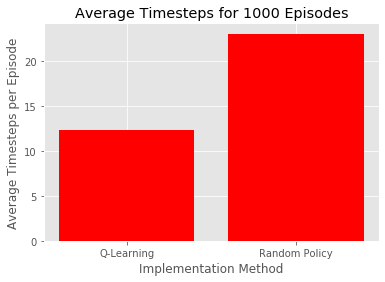

In [29]:
import matplotlib.pyplot as plt 
#plot the avg penalties for q-learning and random policy
#plt.style.use('ggplot')

a = ['Q-Learning','Random Policy']
avg_timestep = [avg_time_q, avg_time]

plt.bar(a, avg_timestep, color= 'red')
plt.xlabel("Implementation Method")
plt.ylabel("Average Timesteps per Episode")
plt.title("Average Timesteps for 1000 Episodes")


plt.show()